# Moving Average Convergence Divergence

## 1. Overview

This script provides functions to calculate the Moving Average Convergence Divergence (MACD) and Signal Line for a given DataFrame. The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.

### Golden Cross and Death Cross:

- **Golden Cross:**
  - A bullish crossover occurs when the MACD line (faster-moving) crosses above the Signal Line.
  - Signifies a reversal from a bearish to a bullish trend.
  - Indicates that the momentum of upward price movement is strengthening.
- **Death Cross:**
  - A bearish crossover occurs when the MACD line crosses below the Signal Line.
  - Signifies a reversal from a bullish to a bearish trend.
  - Indicates that the momentum of downward price movement is strengthening.


## 2. Import Libraries

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## 3. Define Functions

### 3.1 fetch_historical_data

- Fetches historical stock price data from Yahoo Finance for a given list of assets within a specified date range.
- Provides flexibility for fetching data for a single stock or multiple stocks.

In [6]:
def fetch_historical_data(assets, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
    - assets (list or str): List of stock tickers or a single stock ticker as a string.
    - start_date (str): Start date for data retrieval in "YYYY-MM-DD" format.
    - end_date (str): End date for data retrieval in "YYYY-MM-DD" format.

    Returns:
    - pd.DataFrame: Historical stock price data.

    Example:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> start_date = '2023-01-01'
    >>> end_date = '2023-12-31'
    >>> data = fetch_historical_data(assets, start_date, end_date)
    >>> print(data.head())
                  AAPL        GOOGL        MSFT
    Date
    2023-01-01  150.00      2800.00      300.00
    2023-01-02  152.50      2825.00      305.00
    2023-01-03  155.00      2850.00      310.00
    2023-01-04  157.50      2875.00      315.00
    2023-01-05  160.00      2900.00      320.00
    """
    if isinstance(assets, str):
        assets = [assets]

    if len(assets) == 1:
        # Wrap the Series in a DataFrame for consistency:
        data = pd.DataFrame(yf.download(assets, start=start_date, end=end_date)['Adj Close'])
    else:
        data = yf.download(assets, start=start_date, end=end_date)['Adj Close']
    return data

### 3.2 calculate_MACD

- Calculate the Moving Average Convergence Divergence (MACD) and Signal Line for a given DataFrame.
- Allows customization of short-term, long-term, and signal span parameters.

### MACD Parameters:

The choice of parameters (short_span, long_span, and signal_span) in the MACD calculation depends on the trader's or analyst's specific objectives, trading style, and the characteristics of the financial instrument being analyzed.

#### Short-term Span:

- A shorter short_span makes the MACD more sensitive to recent price changes.
- Traders who want more responsiveness to short-term price movements may choose a smaller short_span.
- Common values for short_span range from 8 to 12 periods.

#### Long-term Span:

- A longer long_span smoothens the MACD, making it less sensitive to short-term fluctuations.
- It captures the longer-term trend of the stock or security.
- Common values for long_span range from 26 to 30 periods.

#### Signal Line Span:

- The signal_span is used to smooth the MACD line and generate trading signals.
- A shorter signal_span increases the sensitivity to MACD movements, generating signals earlier.
- A longer signal_span provides a more stable signal but may lag in reacting to recent changes.
- Common values for signal_span range from 9 to 14 periods.

#### Guidelines:

- For short-term trading or analysis, a trader may prefer smaller values for short_span and signal_span to capture more immediate trends.
- For longer-term analysis or investment, larger values for long_span and signal_span may be suitable for a more stable and less reactive indicator.
- Experimenting with different parameter combinations and observing their impact on historical data can help in finding values that suit specific trading strategies.

In [9]:
def calculate_MACD(data, short_span, long_span, signal_span):
    """
    Calculate the Moving Average Convergence Divergence (MACD) and Signal Line for a given DataFrame.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock price data.
    - short_span (int): Span for the short-term Exponential Moving Average (EMA).
    - long_span (int): Span for the long-term Exponential Moving Average (EMA).
    - signal_span (int): Span for the Signal Line.

    Returns:
    - None: Modifies the input DataFrame by adding 'EMA_short', 'EMA_long', 'MACD', and 'Signal Line' columns.
    """
    data['EMA_short'] = data['Adj Close'].ewm(span=short_span, adjust=False).mean()
    data['EMA_long'] = data['Adj Close'].ewm(span=long_span, adjust=False).mean()
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    data['Signal Line'] = data['MACD'].ewm(span=signal_span, adjust=False).mean()

#### Example 1: Calculating the MACD line

In [12]:
    >>> data = fetch_historical_data(['AAPL'], '2022-01-01', '2023-12-31')
    >>> calculate_MACD(data, short_span = 10, long_span = 20, signal_span = 15)
    >>> print(data)

[*********************100%%**********************]  1 of 1 completed
             Adj Close   EMA_short    EMA_long      MACD  Signal Line
Date                                                                 
2022-01-03  179.953873  179.953873  179.953873  0.000000     0.000000
2022-01-04  177.669983  179.538620  179.736359 -0.197739    -0.024717
2022-01-05  172.943985  178.339595  179.089467 -0.749871    -0.115362
2022-01-06  170.056961  176.833662  178.229228 -1.395566    -0.275387
2022-01-07  170.225052  175.632096  177.466925 -1.834829    -0.470317
...                ...         ...         ...       ...          ...
2023-12-22  193.600006  194.957352  193.318843  1.638509     2.415058
2023-12-26  193.050003  194.610561  193.293239  1.317322     2.277841
2023-12-27  193.149994  194.345004  193.279597  1.065407     2.126287
2023-12-28  193.580002  194.205912  193.308207  0.897706     1.972714
2023-12-29  192.529999  193.901201  193.234092  0.667109     1.809513

[501 rows x 5 column

### 3.3 Plot_MACD

- Plots the time series data along with the MACD and Signal Line in a subplot.

In [15]:
def plot_MACD(data, asset, short_span, long_span, signal_span):
    """
    Plot the time series data along with Moving Average, MACD, and Signal Line.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock price data.
    - asset (str): Ticker symbol for the stock.
    - short_span (int): Span for the short-term Exponential Moving Average (EMA).
    - long_span (int): Span for the long-term Exponential Moving Average (EMA).
    - signal_span (int): Span for the Signal Line.

    Returns:
    - None: Displays the time series plot with MACD subplot.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plot Stock Price and Moving Average on the first subplot (ax1)
    ax1.plot(data.index, data['Adj Close'], label=f'{asset} Stock Price', color='blue')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{asset} Time Series Plot')
    ax1.legend()
    ax1.grid(True)

    # Plot MACD and Signal Line on the second subplot (ax2)
    ax2.plot(data.index, data['MACD'], label=f'MACD ({long_span}-day - {short_span}-day EMA)', color='blue')
    ax2.plot(data.index, data['Signal Line'], label=f'Signal Line ({signal_span}-day EMA)', color='red')

    ax2.set_xlabel('Date')
    ax2.set_ylabel('MACD')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    plt.show()


#### Example 2: Plotting MACD

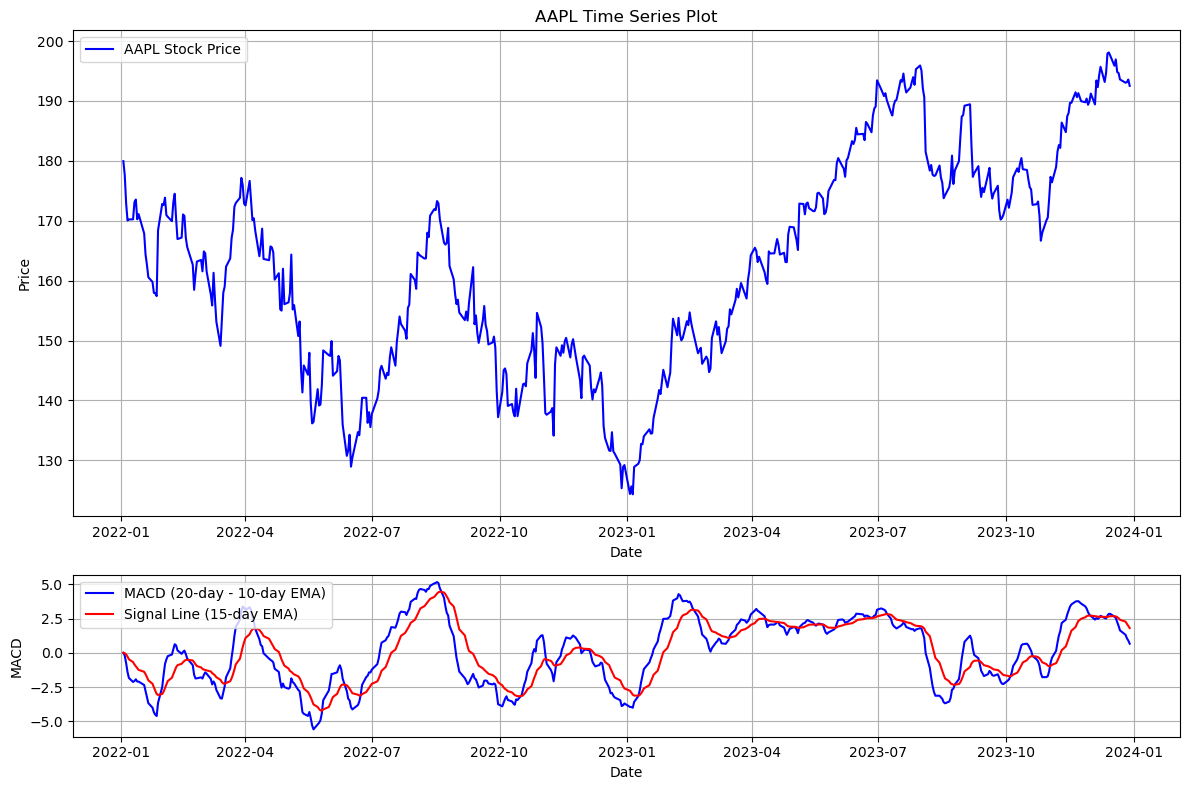

In [18]:
    >>> plot_MACD(data, asset='AAPL', short_span=10, long_span=20, signal_span=15)

## 3.4 configure

- Responsible for setting user-defined configuration parameters.

In [21]:
def configure():
    """
    Configure user-defined settings.

    Returns:
    - tuple: Tuple containing configuration settings (assets, start_date, end_date, window_size, bollinger_std, short_span, long_span, signal_span).
    """    
    assets = ["^VIX", "^GSPC", "^DJI", "^IXIC", "^TYX", "CL=F"]
    start_date = "2001-01-01"
    end_date = "2023-01-01"
    short_span = 20
    long_span = 40
    signal_span = 20

    return assets, start_date, end_date, short_span, long_span, signal_span


## 3.5 main

- The `main` function serves as the central hub for executing the time series analysis and plotting in the script.

[*********************100%%**********************]  1 of 1 completed


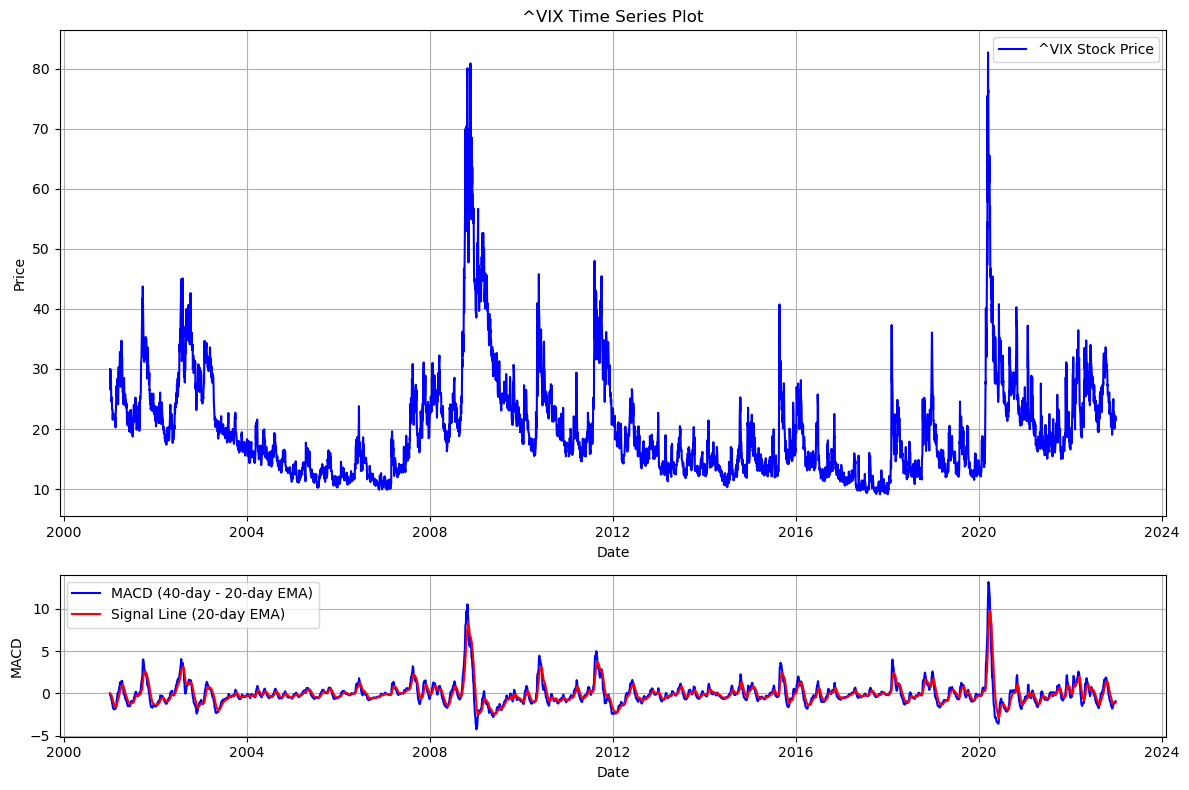

[*********************100%%**********************]  1 of 1 completed


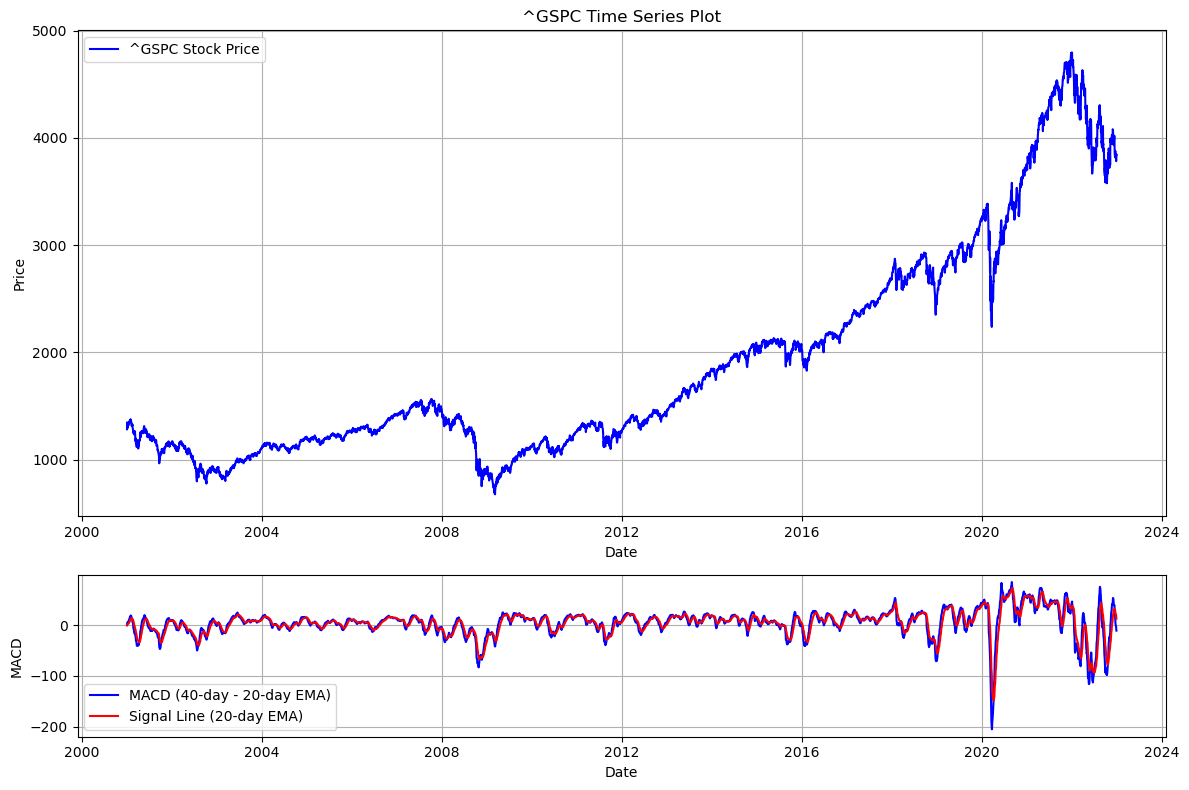

[*********************100%%**********************]  1 of 1 completed


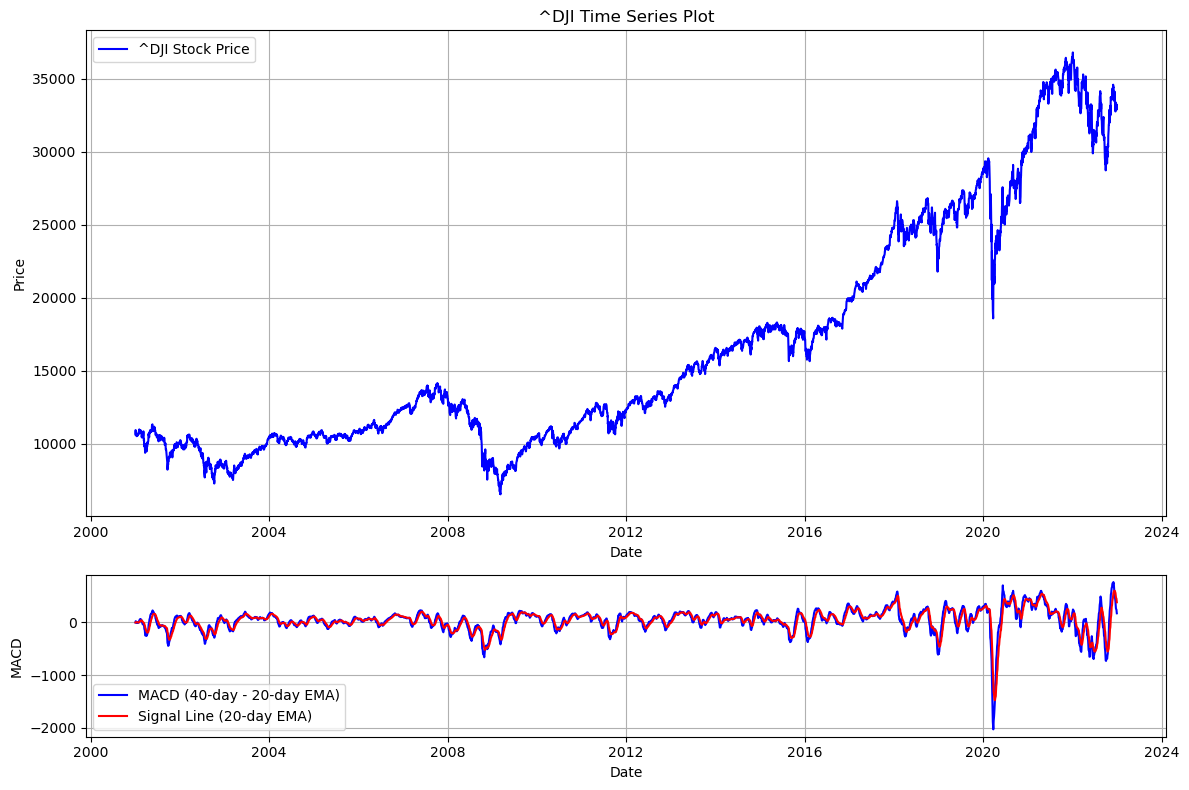

[*********************100%%**********************]  1 of 1 completed


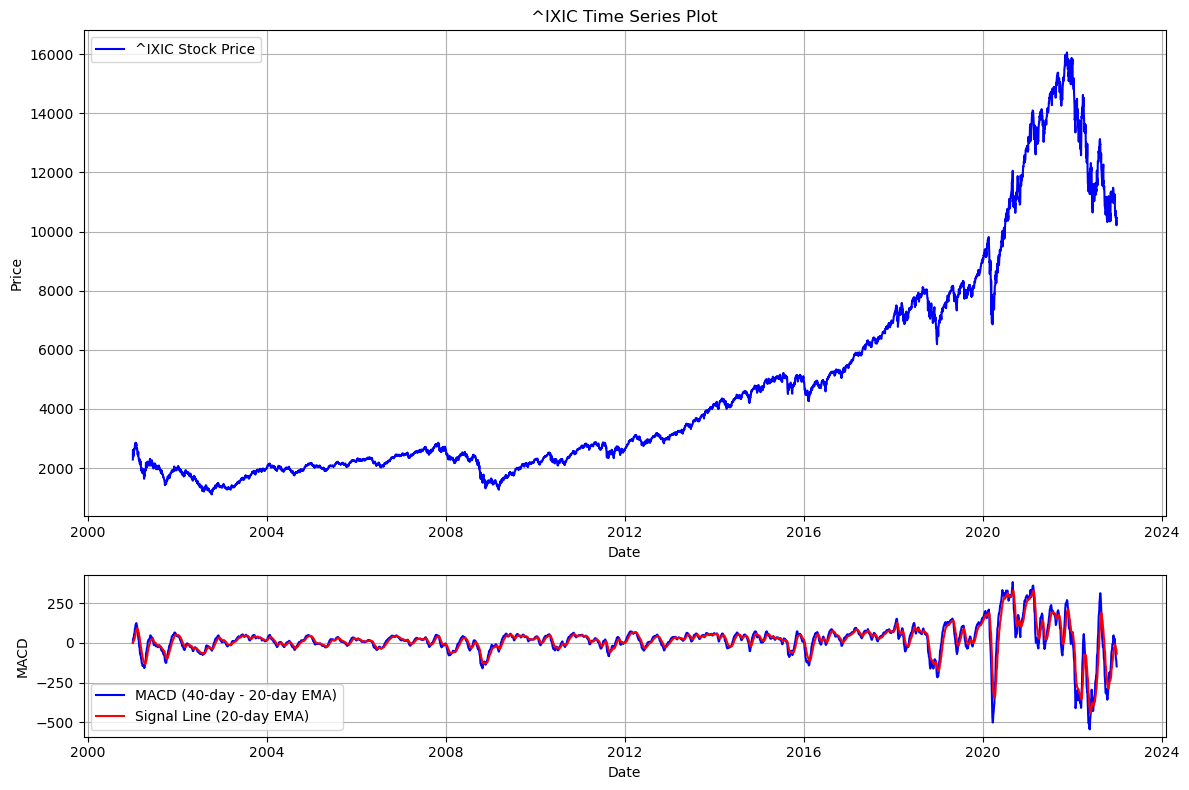

[*********************100%%**********************]  1 of 1 completed


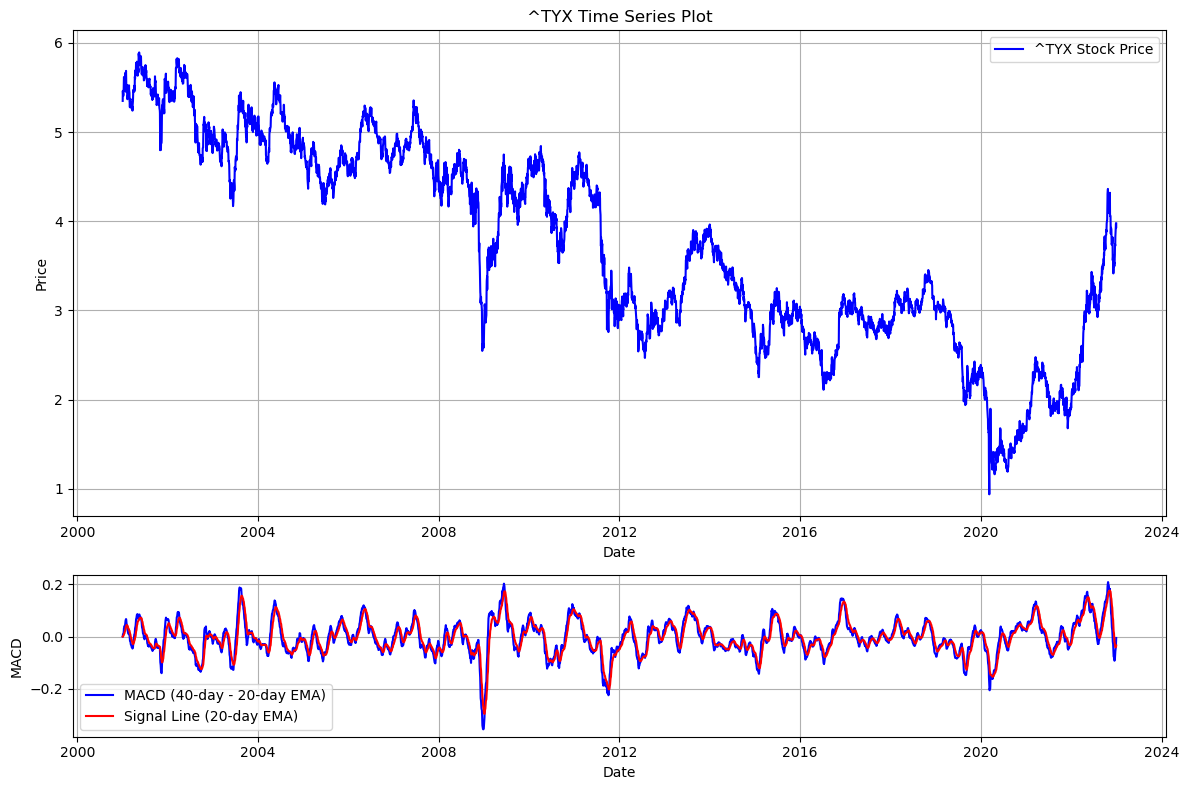

[*********************100%%**********************]  1 of 1 completed


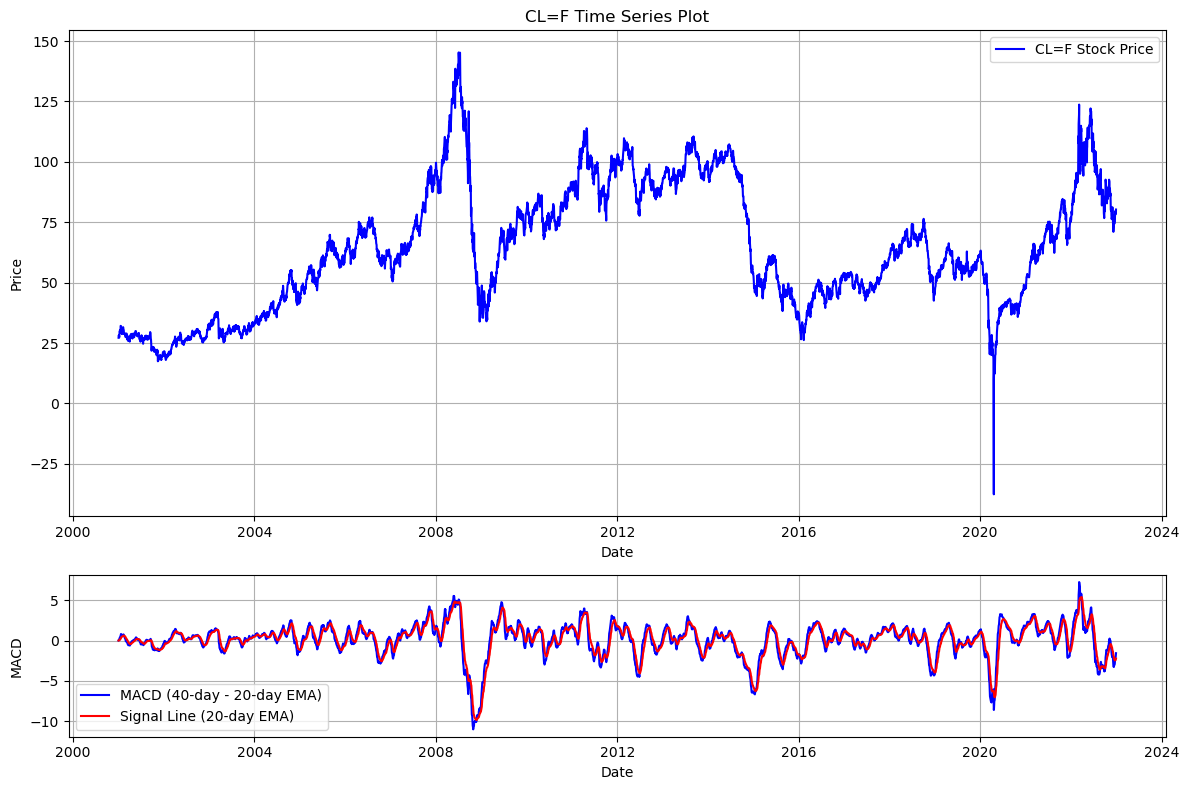

In [24]:
def main():
    """
    Main function to execute the time series analysis and plotting.

    Returns:
    - None: Executes the analysis and plotting for each asset.
    """
    assets, start_date, end_date, short_span, long_span, signal_span = configure()

    for asset in assets:
        data = fetch_historical_data([asset], start_date, end_date)
        calculate_MACD(data, short_span, long_span, signal_span)
        plot_MACD(data, asset, short_span, long_span, signal_span)

if __name__ == "__main__":
    main()
